In [68]:

# https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d
import gym
import numpy as np

In [69]:


env = gym.make('CartPole-v0')

In [78]:

def f(env, weight):
    total_reward = 0.0
    num_run = 100
    for t in range(num_run):
        observation = env.reset()
        for i in range(300):
            action = 1 if np.dot(weight, observation) > 0 else 0
            
            observation, reward, done, info = env.step(action)
            total_reward += reward
            if done:
                break
    return total_reward / num_run

def evolution_strategy(env):
    # hyperparameters
    npop = 50 # population size
    sigma = 0.1 # noise standard deviation
    alpha = 0.001 # learning rate

    # start the optimization
    weight = np.random.rand(4) # our initial guess is random
    for i in range(100):

        # print current fitness of the most likely parameter setting
        print('iter {}. weight: {}, reward: {}'.format(i, str(weight), f(env, weight)))

        # initialize memory for a population of w's, and their rewards
        N = np.random.randn(npop, 4) # samples from a normal distribution N(0,1)
        R = np.zeros(npop)
        for j in range(npop):
            w_try = weight + sigma * N[j] # jitter w using gaussian of sigma 0.1
            R[j] = f(env, w_try) # evaluate the jittered version

        # standardize the rewards to have a gaussian distribution
        A = (R - np.mean(R)) / np.std(R)
        # perform the parameter update. The matrix multiply below
        # is just an efficient way to sum up all the rows of the noise matrix N,
        # where each row N[j] is weighted by A[j]
        weight = weight + alpha / (npop * sigma) * np.dot(N.T, A)

evolution_strategy(env)

iter 0. weight: [0.84314328 0.10170739 0.86669092 0.41695934], reward: 2.3
iter 1. weight: [0.84174082 0.10017531 0.86690512 0.41659573], reward: 2.22
iter 2. weight: [0.84335259 0.10180854 0.8699334  0.41926234], reward: 2.24
iter 3. weight: [0.84115555 0.10172931 0.86926694 0.41826643], reward: 2.26
iter 4. weight: [0.84169442 0.1028776  0.86963211 0.41712597], reward: 2.29
iter 5. weight: [0.83951047 0.10195398 0.87069986 0.41820053], reward: 2.22
iter 6. weight: [0.83817441 0.10074888 0.86914968 0.41761503], reward: 2.21
iter 7. weight: [0.83647646 0.10037401 0.87033432 0.41809612], reward: 2.39
iter 8. weight: [0.83509872 0.10008222 0.87062326 0.41933843], reward: 2.23
iter 9. weight: [0.83341058 0.0986308  0.87237349 0.42043954], reward: 2.12
iter 10. weight: [0.83289562 0.09555721 0.87350369 0.42173511], reward: 2.23
iter 11. weight: [0.83327587 0.09629005 0.87435485 0.4228176 ], reward: 2.14
iter 12. weight: [0.83291731 0.09525157 0.87483322 0.42295781], reward: 2.28
iter 13. w

In [76]:

def f(env, weight):
    total_reward = 0.0
    num_run = 100
    for t in range(num_run):
        observation = env.reset()
        for i in range(300):
            action = 1 if np.dot(weight, observation) > 0 else 0
            
            observation, reward, done, info = env.step(action)
            total_reward += reward
            if done:
                break
    return total_reward / num_run

ws = np.random.randn(100, 4)
rs = []
for w in ws:
    r = f(env, w)
    rs.append(r)
    print(r)

2.31
2.18
2.35
2.24
2.24
2.31
2.13
2.18
2.16
2.26
2.19
2.34
2.19
2.26
2.14
2.15
2.2
2.31
2.2
2.29
2.23
2.17
2.2
2.15
2.3
2.22
2.28
2.33
2.24
2.35
2.21
2.21
2.31
2.3
2.2
2.19
2.2
2.28
2.17
2.23
2.35
2.23
2.28
2.23
2.23
2.2
2.23
2.23
2.25
2.28
2.2
2.21
2.24
2.18
2.29
2.24
2.25
2.22
2.27
2.18
2.29
2.14
2.22
2.14
2.31
2.25
2.19
2.24
2.12
2.27
2.15
2.19
2.31
2.24
2.2
2.24
2.27
2.26
2.14
2.22
2.22
2.27
2.26
2.14
2.18
2.26
2.23
2.19
2.37
2.17
2.22
2.21
2.31
2.27
2.16
2.29
2.29
2.26
2.3
2.2


In [22]:
w = ws[np.argmax(rs)]

In [75]:
g = env.env.gravity
m = env.env.masspole
g, m

(10000.0, 10000.0)

In [72]:
rs = np.zeros((10, 10))
for i, mp in enumerate(np.logspace(-3, 4, 10)):
    for j, gp in enumerate(np.logspace(-1, 4, 10)):
        env.env.gravity = gp
        env.env.masspole = mp
        env.env.total_mass = env.env.masspole + env.env.masscart

        rs[i, j] = f(env, w)
        if i%3==0 and j%3==0:
            print(i,j)
            print(rs[i, j])
        

0 0
200.0
0 3
124.89
0 6
11.42
0 9
2.93
3 0
200.0
3 3
110.53
3 6
10.72
3 9
2.93
6 0
200.0
6 3
46.82
6 6
6.06
6 9
2.21
9 0
170.57
9 3
31.57
9 6
6.45
9 9
2.25


In [73]:
rs[0]

array([200.  , 200.  , 177.49, 124.89,  54.41,  24.71,  11.42,   6.69,
         4.16,   2.93])

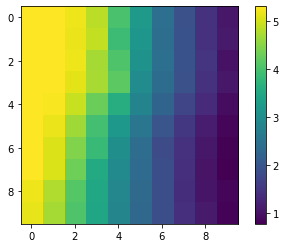

In [74]:
import matplotlib.pyplot as plt
plt.imshow(np.log(rs))
plt.colorbar()

In [86]:
a = np.zeros((10,10))

for i in range(1001):
    a[np.random.randint(low=0, high=10), np.random.randint(low=0, high=10)]+=1
    
    # if i%100==0:
    #     plt.imshow(a)
    #     plt.show()

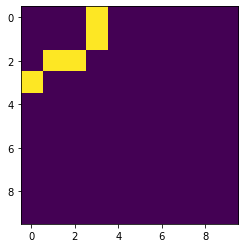

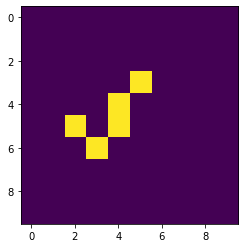

In [107]:
a = np.zeros((10,10))
a[[3, 2, 2, 1, 0], [0, 1, 2, 3, 3]] = 1
plt.imshow(a)
plt.show()
a = np.zeros((10,10))
a[[5, 6, 5, 4, 3], [2, 3, 4, 4, 5]] = 1
# a[[7, 6, 5, 4, 3, 2, 1, 0], [0, 1, 2, 3, 4, 5, 6, 7]] = 1

plt.imshow(a)
plt.show()

In [7]:
import torch

In [9]:
%%timeit

a = np.zeros(1000)

1.29 µs ± 31.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%%timeit

a = np.zeros(1000)
a = torch.from_numpy(a)
a = a.numpy()

3.83 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
